In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets


In [28]:
data = datasets.fetch_california_housing(as_frame=True)
cal_df = pd.DataFrame(data.data, columns=data.feature_names)


In [29]:
cal.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [30]:
cal_df['age_category'] = pd.cut(cal_df['HouseAge'], bins=[0, 10, 20, 30, 40, 50, np.inf], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50+'])

avg_rooms_by_age = cal_df.groupby('age_category', observed=False)['AveRooms'].mean()

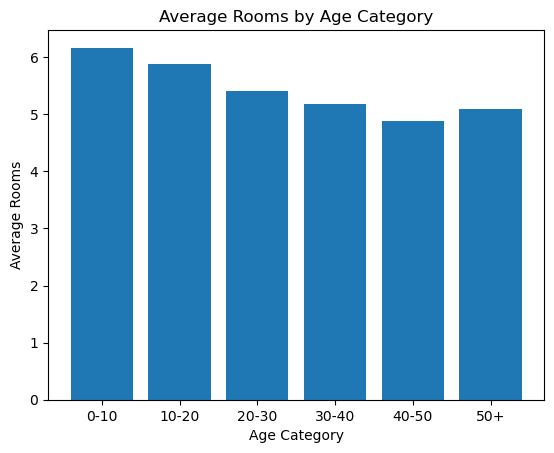

In [33]:
plt.bar(avg_rooms_by_age.index, avg_rooms_by_age.values)
plt.xlabel('Age Category')
plt.ylabel('Average Rooms')
plt.title('Average Rooms by Age Category')
plt.show()

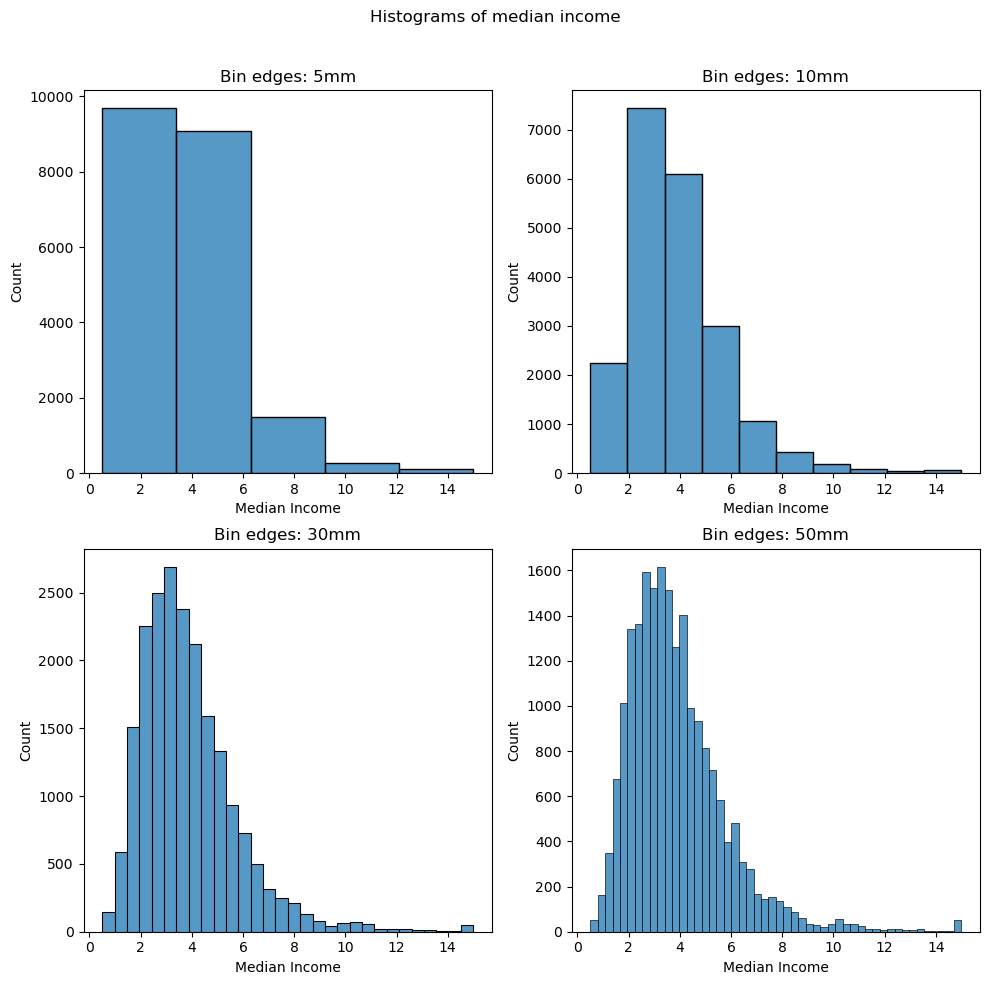

In [52]:
bin_edges = [5, 10, 30, 50]

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

fig.suptitle('Histograms of median income')

titles = [f'Bin edges: {bw}mm' for bw in bin_edges]

for ax, bin_width, title in zip(ax.flat, bin_edges, titles):
    ax.set_title(title)

    ax.set_xlabel('Median Income')
    ax.set_ylabel('Count')

    sns.histplot(cal_df['MedInc'], bins=bin_width, ax=ax)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()

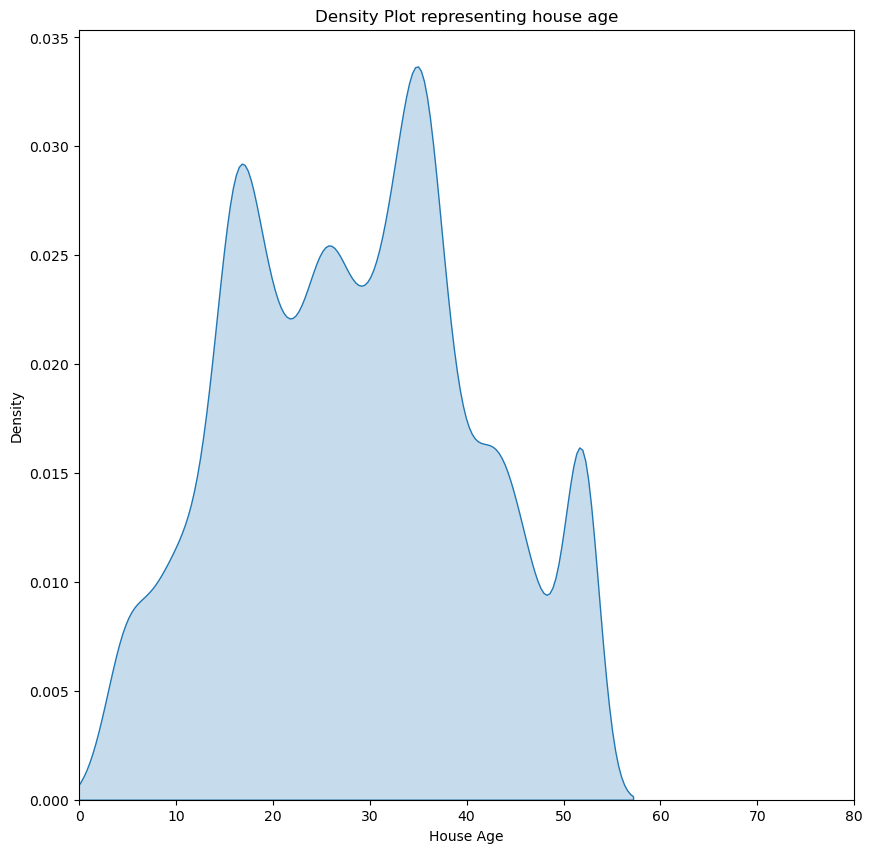

In [63]:
plt.figure(figsize=(10, 10))
sns.kdeplot(cal_df['HouseAge'], fill=True)
plt.xlim(0, 80)
plt.title('Density Plot representing house age')
plt.xlabel('House Age')
plt.ylabel('Density')
plt.show()

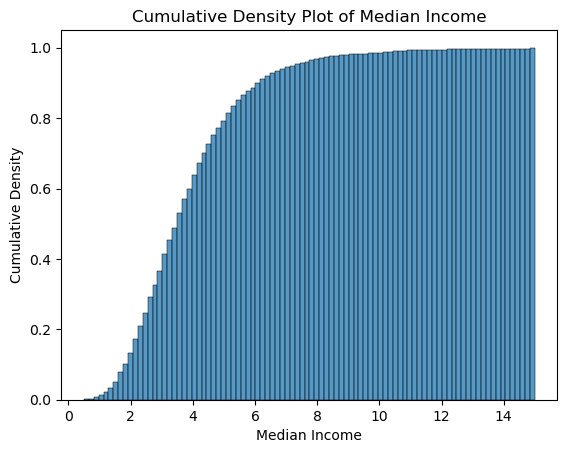

In [64]:
sns.histplot(cal_df['MedInc'], stat='density', cumulative=True, common_norm=False)

plt.xlabel('Median Income')
plt.ylabel('Cumulative Density')
plt.title('Cumulative Density Plot of Median Income')
plt.show()